In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np

In [2]:
data = pd.read_csv("app_data_d.csv")

In [3]:
## Installs의 값 1,000,000,000+의 개수가 적은 관계로 편의상 100,000,000~ 범위 안에 포함시킨다
data = data.replace('1,000,000,000+', '100,000,000 ~')

In [5]:
data

,Unnamed: 0,Unnamed: 0.1,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000 ~ 100,000",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"100,000 ~ 1,000,000",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"1,000,000 ~ 10,000,000",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"10,000,000 ~ 100,000,000",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000 ~ 1,000,000",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8879,9361,10834,FR Calculator,FAMILY,4.0,7,2600.0,"1 ~ 1,000",Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
8880,9362,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"1,000 ~ 10,000",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
8881,9363,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,"1 ~ 1,000",Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
8882,9364,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000 ~ 10,000",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [6]:
##Installs에 따라 데이터의 갯수를 적어준다.
df_install=data["Installs"].value_counts()
df_install

1,000,000 ~ 10,000,000      2167
100,000 ~ 1,000,000         1626
10,000 ~ 100,000            1451
10,000,000 ~ 100,000,000    1400
1,000 ~ 10,000              1123
1 ~ 1,000                    639
100,000,000 ~                478
Name: Installs, dtype: int64

In [7]:
##df_install을 dataframe으로 바꿔줌
df_install = pd.DataFrame(df_install)
df_install_count = df_install.reset_index()
df_install_count.columns = ["Installs", "App_count"]
df_install_count

,Installs,App_count
0,"1,000,000 ~ 10,000,000",2167
1,"100,000 ~ 1,000,000",1626
2,"10,000 ~ 100,000",1451
3,"10,000,000 ~ 100,000,000",1400
4,"1,000 ~ 10,000",1123
5,"1 ~ 1,000",639
6,"100,000,000 ~",478


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1,000,000 ~ 10,000,000'),
  Text(1, 0, '100,000 ~ 1,000,000'),
  Text(2, 0, '10,000 ~ 100,000'),
  Text(3, 0, '10,000,000 ~ 100,000,000'),
  Text(4, 0, '1,000 ~ 10,000'),
  Text(5, 0, '1 ~ 1,000'),
  Text(6, 0, '100,000,000 ~')])

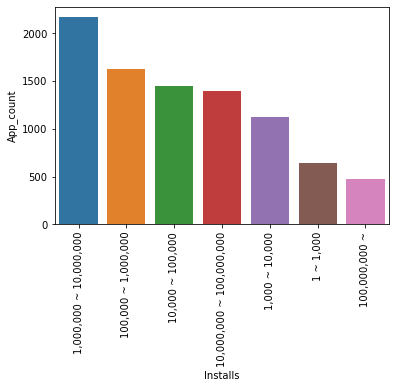

In [9]:
## data_install_count를 barplot으로 그려줌
sns.barplot(x="Installs", y="App_count", data = df_install_count)

plt.xticks(rotation = 90, fontsize = 10)

In [10]:
## Installs와 Type column을 합쳐서 새로운 column "Installs_Type_count"fmf 만든 후 data에 추가한다
def combine_columns(col_1, col_2):
    col_comb = col_1 +" "+ col_2
    return col_comb

data["Installs_Type_count"] = data.apply(lambda x: combine_columns(x['Installs'], x['Type']), axis=1)
data

,Unnamed: 0,Unnamed: 0.1,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_Type_count
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000 ~ 100,000",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,"10,000 ~ 100,000 Free"
1,1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"100,000 ~ 1,000,000",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,"100,000 ~ 1,000,000 Free"
2,2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"1,000,000 ~ 10,000,000",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,"1,000,000 ~ 10,000,000 Free"
3,3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"10,000,000 ~ 100,000,000",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,"10,000,000 ~ 100,000,000 Free"
4,4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000 ~ 1,000,000",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,"100,000 ~ 1,000,000 Free"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8879,9361,10834,FR Calculator,FAMILY,4.0,7,2600.0,"1 ~ 1,000",Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,"1 ~ 1,000 Free"
8880,9362,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"1,000 ~ 10,000",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,"1,000 ~ 10,000 Free"
8881,9363,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,"1 ~ 1,000",Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,"1 ~ 1,000 Free"
8882,9364,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000 ~ 10,000",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,"1,000 ~ 10,000 Free"


In [11]:
## Installs_Type_count에 따른 data 개수를 구한다
data["Installs_Type_count"].value_counts()

1,000,000 ~ 10,000,000 Free      2146
100,000 ~ 1,000,000 Free         1529
10,000,000 ~ 100,000,000 Free    1397
10,000 ~ 100,000 Free            1292
1,000 ~ 10,000 Free               927
1 ~ 1,000 Free                    503
100,000,000 ~ Free                478
1,000 ~ 10,000 Paid               196
10,000 ~ 100,000 Paid             159
1 ~ 1,000 Paid                    136
100,000 ~ 1,000,000 Paid           97
1,000,000 ~ 10,000,000 Paid        21
10,000,000 ~ 100,000,000 Paid       3
Name: Installs_Type_count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '10,000 ~ 100,000 Free'),
  Text(1, 0, '100,000 ~ 1,000,000 Free'),
  Text(2, 0, '1,000,000 ~ 10,000,000 Free'),
  Text(3, 0, '10,000,000 ~ 100,000,000 Free'),
  Text(4, 0, '1,000 ~ 10,000 Free'),
  Text(5, 0, '100,000,000 ~ Free'),
  Text(6, 0, '100,000 ~ 1,000,000 Paid'),
  Text(7, 0, '10,000 ~ 100,000 Paid'),
  Text(8, 0, '1,000 ~ 10,000 Paid'),
  Text(9, 0, '1 ~ 1,000 Paid'),
  Text(10, 0, '1 ~ 1,000 Free'),
  Text(11, 0, '10,000,000 ~ 100,000,000 Paid'),
  Text(12, 0, '1,000,000 ~ 10,000,000 Paid')])

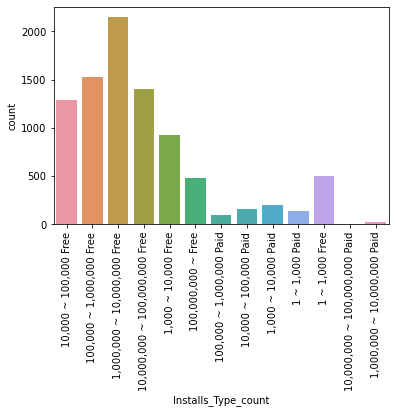

In [12]:
## Installs_Type_count에 대한 countplot을 그려본다
sns.countplot(x="Installs_Type_count", data= data)
plt.xticks(rotation = 90, fontsize = 10)

In [13]:
## Installs(범주형 데이터)와 Type(범주형 데이터)의 상관성을 증명하기 위해 카이제곱검정을 사용한다.
## 귀무가설: Installs 와 Type은 관계가 없다 / 대립가설: Installs 와 Type은 관계가 있다.
obs = np.array([
    [503, 927, 1292, 1529, 2146, 1397, 478],
    [136, 196, 159, 97, 21, 3, 0]
])
chi2, p, dof, ex = chi2_contingency(obs, correction=False)
##카이제곱 과 p-value 출력
print(chi2, p)
# degree of freedom 출력
print(dof)
#expected count 출력
print(ex)

692.4270264117063 2.6396630873980055e-146
6
[[ 594.98063935 1045.6389014  1351.04367402 1513.98829356 2017.71994597
  1303.55695633  445.07158937]
 [  44.01936065   77.3610986    99.95632598  112.01170644  149.28005403
    96.44304367   32.92841063]]


In [ ]:
## p-value의 값이 0.05보다 작으므로 귀무가설을 반박한다. 따라서 Installs와 Type은 상관관계가 존재한다.